# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
#weather_api_key = "f10e0481a799c4b470644618dc3705e0"
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
all_city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_data = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_data['coord']['lat']
        city_lng = city_data['coord']['lon']
        city_max_temp = city_data['main']['temp_max']
        city_humidity = city_data['main']['humidity']
        city_clouds = city_data['clouds']['all']
        city_wind = city_data['wind']['speed']
        city_country = city_data['sys']['country']
        city_date = city_data['dt']
        
        
        print(f"Processing Record {record_count} | {city}")


        # Append the City information into city_data list
        all_city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 | iqaluit
Processing Record 2 of Set 1 | tiksi
Processing Record 3 | tiksi
Processing Record 3 of Set 1 | nadym
Processing Record 4 | nadym
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 | new norfolk
Processing Record 5 of Set 1 | adamstown
Processing Record 6 | adamstown
Processing Record 6 of Set 1 | tolanaro
Processing Record 7 | tolanaro
Processing Record 7 of Set 1 | tinghir
Processing Record 8 | tinghir
Processing Record 8 of Set 1 | waitangi
Processing Record 9 | waitangi
Processing Record 9 of Set 1 | castel di sangro
Processing Record 10 | castel di sangro
Processing Record 10 of Set 1 | pangody
Processing Record 11 | pangody
Processing Record 11 of Set 1 | kapuskasing
Processing Record 12 | kapuskasing
Processing Record 12 of Set 1 | katsuura
Processing Record 13 | katsuura
Processing Record 13 of Set 1 | utrik
Processing Record 14 | utrik
Pr

Processing Record 9 | guerrero negro
Processing Record 9 of Set 3 | antalaha
Processing Record 10 | antalaha
Processing Record 10 of Set 3 | thompson
Processing Record 11 | thompson
Processing Record 11 of Set 3 | pariang
City not found. Skipping...
Processing Record 12 of Set 3 | awjilah
Processing Record 13 | awjilah
Processing Record 13 of Set 3 | jamestown
Processing Record 14 | jamestown
Processing Record 14 of Set 3 | nongpoh
Processing Record 15 | nongpoh
Processing Record 15 of Set 3 | nogliki
Processing Record 16 | nogliki
Processing Record 16 of Set 3 | codrington
Processing Record 17 | codrington
Processing Record 17 of Set 3 | kirkland lake
Processing Record 18 | kirkland lake
Processing Record 18 of Set 3 | kyzyl
Processing Record 19 | kyzyl
Processing Record 19 of Set 3 | benguela
Processing Record 20 | benguela
Processing Record 20 of Set 3 | udachny
Processing Record 21 | udachny
Processing Record 21 of Set 3 | coquimbo
Processing Record 22 | coquimbo
Processing Record 

Processing Record 21 | yura
Processing Record 21 of Set 5 | carbonear
Processing Record 22 | carbonear
Processing Record 22 of Set 5 | sisimiut
Processing Record 23 | sisimiut
Processing Record 23 of Set 5 | bathsheba
Processing Record 24 | bathsheba
Processing Record 24 of Set 5 | badger
Processing Record 25 | badger
Processing Record 25 of Set 5 | porto novo
Processing Record 26 | porto novo
Processing Record 26 of Set 5 | miguel ahumada
Processing Record 27 | miguel ahumada
Processing Record 27 of Set 5 | tabou
Processing Record 28 | tabou
Processing Record 28 of Set 5 | hithadhoo
Processing Record 29 | hithadhoo
Processing Record 29 of Set 5 | zhaodong
Processing Record 30 | zhaodong
Processing Record 30 of Set 5 | ponta delgada
Processing Record 31 | ponta delgada
Processing Record 31 of Set 5 | phetchaburi
Processing Record 32 | phetchaburi
Processing Record 32 of Set 5 | whitehorse
Processing Record 33 | whitehorse
Processing Record 33 of Set 5 | saudarkrokur
Processing Record 3

Processing Record 34 | arvayheer
Processing Record 34 of Set 7 | mount pleasant
Processing Record 35 | mount pleasant
Processing Record 35 of Set 7 | naqadeh
Processing Record 36 | naqadeh
Processing Record 36 of Set 7 | pitea
Processing Record 37 | pitea
Processing Record 37 of Set 7 | ivdel'
Processing Record 38 | ivdel'
Processing Record 38 of Set 7 | vilyuysk
Processing Record 39 | vilyuysk
Processing Record 39 of Set 7 | tazovsky
Processing Record 40 | tazovsky
Processing Record 40 of Set 7 | pirallahi
Processing Record 41 | pirallahi
Processing Record 41 of Set 7 | praia da vitoria
Processing Record 42 | praia da vitoria
Processing Record 42 of Set 7 | tortoli
Processing Record 43 | tortoli
Processing Record 43 of Set 7 | kushiro
Processing Record 44 | kushiro
Processing Record 44 of Set 7 | dongkan
Processing Record 45 | dongkan
Processing Record 45 of Set 7 | rio grande
Processing Record 46 | rio grande
Processing Record 46 of Set 7 | richmond hill
Processing Record 47 | richmo

Processing Record 49 | ambon
Processing Record 49 of Set 9 | ulladulla
Processing Record 50 | ulladulla
Processing Record 0 of Set 10 | ndele
Processing Record 1 | ndele
Processing Record 1 of Set 10 | cabedelo
Processing Record 2 | cabedelo
Processing Record 2 of Set 10 | arraial do cabo
Processing Record 3 | arraial do cabo
Processing Record 3 of Set 10 | puerto san jose
Processing Record 4 | puerto san jose
Processing Record 4 of Set 10 | amursk
Processing Record 5 | amursk
Processing Record 5 of Set 10 | hwange
Processing Record 6 | hwange
Processing Record 6 of Set 10 | amga
Processing Record 7 | amga
Processing Record 7 of Set 10 | baiquan
Processing Record 8 | baiquan
Processing Record 8 of Set 10 | bad marienberg
Processing Record 9 | bad marienberg
Processing Record 9 of Set 10 | homer
Processing Record 10 | homer
Processing Record 10 of Set 10 | suva
Processing Record 11 | suva
Processing Record 11 of Set 10 | madalena
Processing Record 12 | madalena
Processing Record 12 of S

Processing Record 10 | greymouth
Processing Record 10 of Set 12 | alibag
Processing Record 11 | alibag
Processing Record 11 of Set 12 | matehuala
Processing Record 12 | matehuala
Processing Record 12 of Set 12 | ghat
Processing Record 13 | ghat
Processing Record 13 of Set 12 | inhambane
Processing Record 14 | inhambane
Processing Record 14 of Set 12 | belyy yar
Processing Record 15 | belyy yar
Processing Record 15 of Set 12 | pundong
Processing Record 16 | pundong
Processing Record 16 of Set 12 | wamba
Processing Record 17 | wamba
Processing Record 17 of Set 12 | tuy hoa
Processing Record 18 | tuy hoa
Processing Record 18 of Set 12 | alofi
Processing Record 19 | alofi
Processing Record 19 of Set 12 | cidreira
Processing Record 20 | cidreira
Processing Record 20 of Set 12 | pontes e lacerda
Processing Record 21 | pontes e lacerda
Processing Record 21 of Set 12 | santa ana
Processing Record 22 | santa ana
Processing Record 22 of Set 12 | nizhneangarsk
Processing Record 23 | nizhneangarsk

In [5]:
print(all_city_data)


[{'City': 'Iqaluit', 'Lat': 63.7506, 'Lng': -68.5145, 'Max Temp': -31.27, 'Humidity': 56, 'Cloudiness': 40, 'Wind Speed': 17.27, 'Country': 'CA', 'Date': 1706467011}, {'City': 'Tiksi', 'Lat': 71.6872, 'Lng': 128.8694, 'Max Temp': -10.34, 'Humidity': 73, 'Cloudiness': 91, 'Wind Speed': 15.39, 'Country': 'RU', 'Date': 1706467012}, {'City': 'Nadym', 'Lat': 65.5333, 'Lng': 72.5167, 'Max Temp': 8.02, 'Humidity': 96, 'Cloudiness': 100, 'Wind Speed': 9.75, 'Country': 'RU', 'Date': 1706467012}, {'City': 'New Norfolk', 'Lat': -42.7826, 'Lng': 147.0587, 'Max Temp': 62.1, 'Humidity': 97, 'Cloudiness': 15, 'Wind Speed': 3.56, 'Country': 'AU', 'Date': 1706467012}, {'City': 'Adamstown', 'Lat': -25.066, 'Lng': -130.1015, 'Max Temp': 76.26, 'Humidity': 75, 'Cloudiness': 100, 'Wind Speed': 10.83, 'Country': 'PN', 'Date': 1706467012}, {'City': 'Tolanaro', 'Lat': -25.0319, 'Lng': 46.9987, 'Max Temp': 75.27, 'Humidity': 83, 'Cloudiness': 40, 'Wind Speed': 13.8, 'Country': 'MG', 'Date': 1706467012}, {'City

In [6]:


# Convert the cities weather data into a Pandas DataFrame
city_weather_df = pd.DataFrame(all_city_data)
print("Number of records in all_city_data:", len(all_city_data))
# Show Record Count
print(city_weather_df.count())


Number of records in all_city_data: 547
City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64


In [7]:
# Display sample data
city_weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,-31.27,56,40,17.27,CA,1706467011
1,Tiksi,71.6872,128.8694,-10.34,73,91,15.39,RU,1706467012
2,Nadym,65.5333,72.5167,8.02,96,100,9.75,RU,1706467012
3,New Norfolk,-42.7826,147.0587,62.10,97,15,3.56,AU,1706467012
4,Adamstown,-25.0660,-130.1015,76.26,75,100,10.83,PN,1706467012
5,Tolanaro,-25.0319,46.9987,75.27,83,40,13.80,MG,1706467012
6,Tinghir,31.5157,-5.5343,53.76,20,1,3.96,MA,1706467012
7,Waitangi,-43.9535,-176.5597,63.82,97,100,11.01,NZ,1706467012
8,Castel Di Sangro,41.7737,14.1035,41.04,60,0,6.33,IT,1706467012
9,Pangody,65.8500,74.4859,3.65,97,100,9.06,RU,1706467013


In [8]:
# Export the City_Data into a csv
city_weather_df.to_csv("cities2.csv", index_label="City_ID")

In [9]:
# Read saved data
city_weather_df2 = pd.read_csv("cities2.csv", index_col="City_ID")

# Display sample data
city_weather_df2.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Iqaluit,63.7506,-68.5145,-31.27,56,40,17.27,CA,1706467011
1,Tiksi,71.6872,128.8694,-10.34,73,91,15.39,RU,1706467012
2,Nadym,65.5333,72.5167,8.02,96,100,9.75,RU,1706467012
3,New Norfolk,-42.7826,147.0587,62.10,97,15,3.56,AU,1706467012
4,Adamstown,-25.0660,-130.1015,76.26,75,100,10.83,PN,1706467012
5,Tolanaro,-25.0319,46.9987,75.27,83,40,13.80,MG,1706467012
6,Tinghir,31.5157,-5.5343,53.76,20,1,3.96,MA,1706467012
7,Waitangi,-43.9535,-176.5597,63.82,97,100,11.01,NZ,1706467012
8,Castel Di Sangro,41.7737,14.1035,41.04,60,0,6.33,IT,1706467012


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

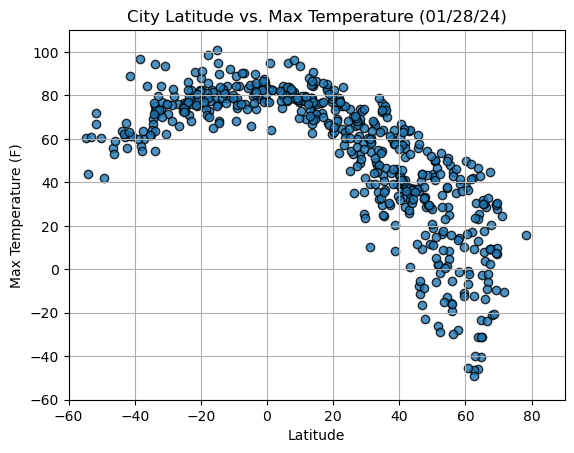

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x = city_weather_df["Lat"], 
            y = city_weather_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.xlim(-60, 90)
plt.ylim(-60, 110)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

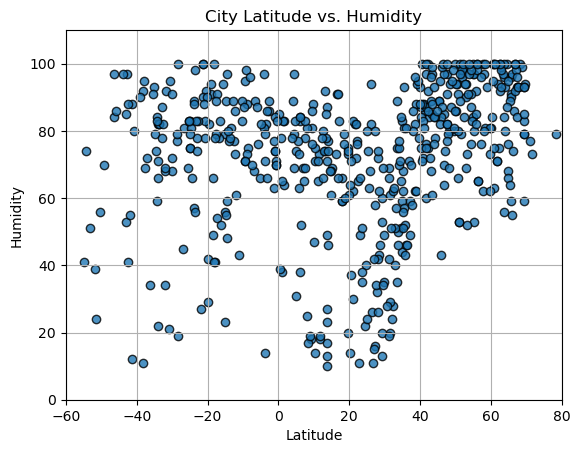

In [11]:
# Build the scatter plots for latitude vs. humidity

# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_weather_df["Lat"], 
            y = city_weather_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.xlim(-60, 80)
plt.ylim(0, 110)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

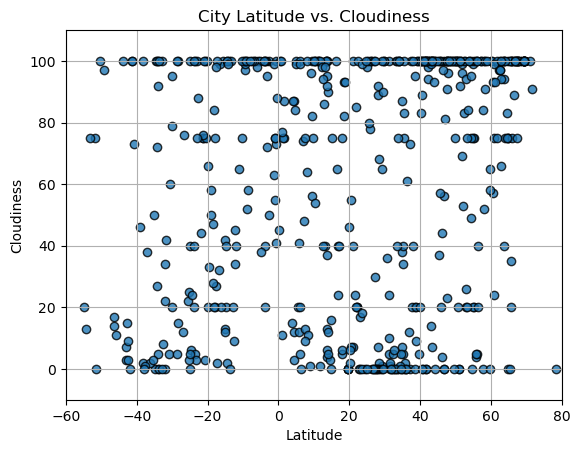

In [12]:
# Build the scatter plots for latitude vs. cloudiness

# Incorporate the other graph properties
plt.scatter(x = city_weather_df["Lat"], 
            y = city_weather_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.xlim(-60, 80)
plt.ylim(-10, 110)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

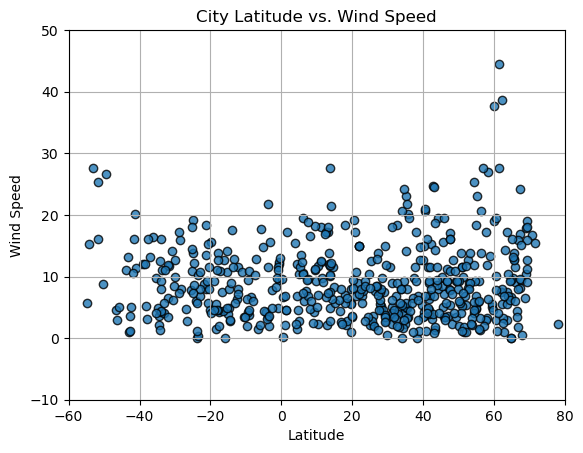

In [13]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(x = city_weather_df["Lat"], 
            y = city_weather_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.xlim(-60, 80)
plt.ylim(-10, 50)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
  

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_weather_df.loc[city_weather_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,-31.27,56,40,17.27,CA,1706467011
1,Tiksi,71.6872,128.8694,-10.34,73,91,15.39,RU,1706467012
2,Nadym,65.5333,72.5167,8.02,96,100,9.75,RU,1706467012
6,Tinghir,31.5157,-5.5343,53.76,20,1,3.96,MA,1706467012
8,Castel Di Sangro,41.7737,14.1035,41.04,60,0,6.33,IT,1706467012


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Display sample data
southern_hemi_df = city_weather_df.loc[city_weather_df["Lat"]<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,New Norfolk,-42.7826,147.0587,62.10,97,15,3.56,AU,1706467012
4,Adamstown,-25.0660,-130.1015,76.26,75,100,10.83,PN,1706467012
5,Tolanaro,-25.0319,46.9987,75.27,83,40,13.80,MG,1706467012
7,Waitangi,-43.9535,-176.5597,63.82,97,100,11.01,NZ,1706467012
14,Saint-Pierre,-21.3393,55.4781,76.68,100,75,18.41,RE,1706467013


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8084932144534943


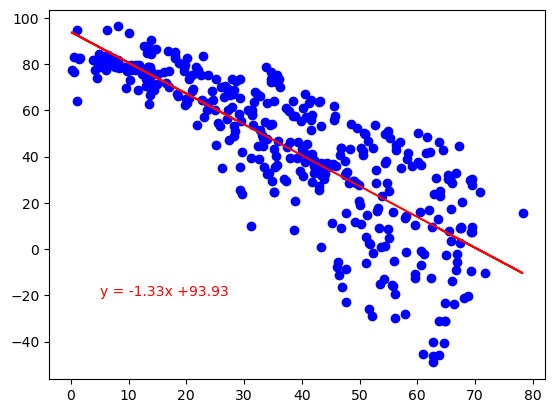

In [17]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', facecolor='b')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5,-20),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")


print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.622561705943961


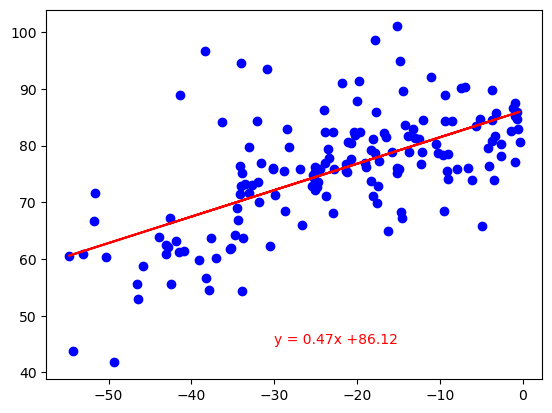

In [18]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', facecolor='b')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,45),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.46548452880323166


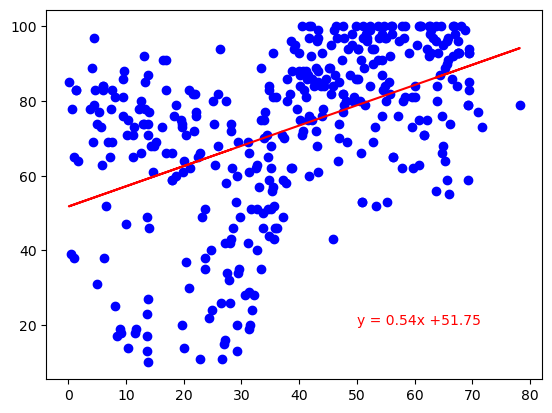

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o', facecolor='b')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,20),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.1572672483831981


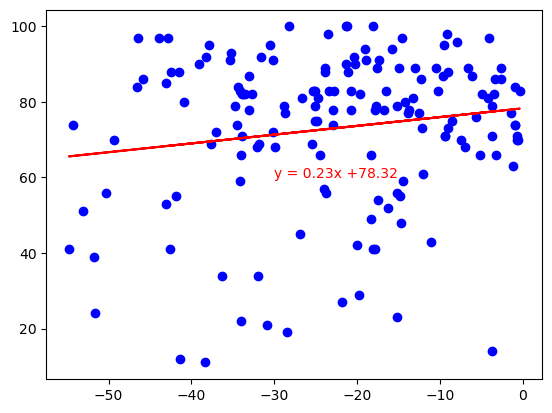

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', facecolor='b')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,60),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.26448353578970435


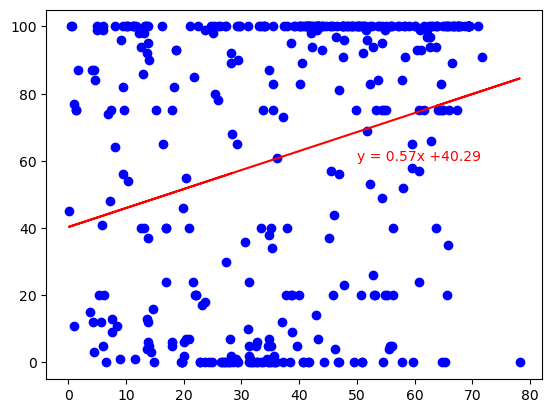

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o', facecolor='b')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,60),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.33987792893970387


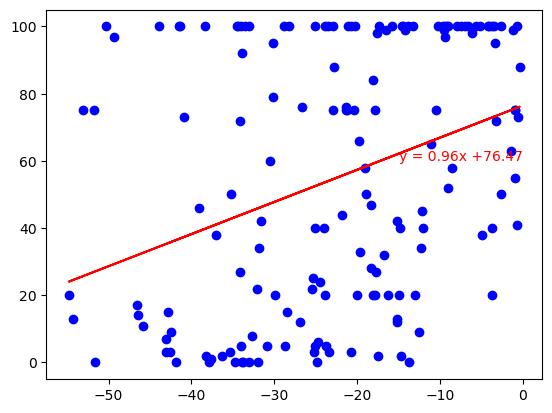

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', facecolor='b')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-15,60),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.08800762053320478


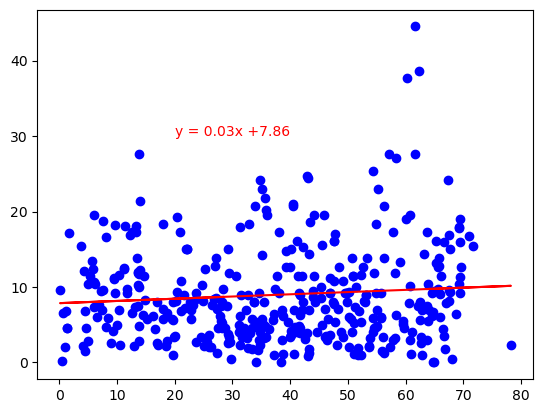

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o', facecolor='b')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,30),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.18273869541296714


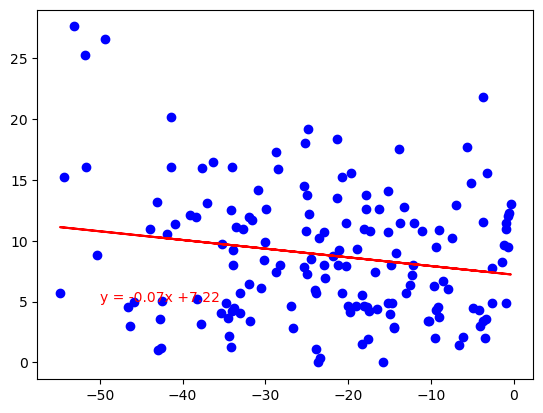

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', facecolor='b')

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,5),fontsize=10,color="red")
plt.plot(x,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE